# Crawling Data on Twitter


In [ ]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,951 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,994 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-securi

In [ ]:
# Crawl Data

filename = 'sirekap4.csv'
search_keyword = 'sirekap until:2024-02-14 since:2024-02-13'
limit = 800

!npx --yes tweet-harvest@2.2.8 -o "{filename}" -s "{search_keyword}" -l {limit} --token ""


Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.

? What's your Twitter auth token? › 78

# Integrated Data

In [54]:
import pandas as pd
df0 = pd.read_csv("sirekap0.csv", delimiter=";")
df1 = pd.read_csv("sirekap1.csv", delimiter=";")
df2 = pd.read_csv("sirekap2.csv", delimiter=";")
df3 = pd.read_csv("sirekap3.csv", delimiter=";")
df4 = pd.read_csv("sirekap4.csv", delimiter=";")
# the default behaviour is join='outer'
# inner join

# Concatenate DataFrames
dfs = [df0, df1, df2, df3, df4]
df = pd.concat(dfs, ignore_index=True)

# Create downloadable CSV file with informative filename
filename = "integrated_sirekap.csv"  # Includes date
df.to_csv(filename, index=False)  # Avoid including index as extra column

In [56]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv("integrated_sirekap.csv")

# Drop unwanted columns (corrected indentation)
columns_to_drop = [
    'created_at', 'id_str', 'quote_count', 'reply_count', 'retweet_count',
    'favorite_count', 'lang', 'user_id_str', 'conversation_id_str', 'username',
    'tweet_url'
]
df = df.drop(columns_to_drop, axis=1)  # Explicitly specify axis=1

# Display the first few rows
df.head()

full_text
0   @iam_zelt Diberi nilai oleh Rakyat atau SIREKAP?
1  @faizalassegaf siRekap melulu bro?? 🤭   buktik...
2  Betul sekali, stlh tipu2 sirekap dibongkar sam...
3  Sirekap kenapa dah? apa suara yg salah input s...
4  PENGGANTIAN ATAU PERUBAHAN  SISTEM HITUNG SUAR...

In [57]:
df.shape

(2970, 1)

# Prepocessing Data

In [58]:
texts = df['full_text'].tolist()
texts

['@iam_zelt Diberi nilai oleh Rakyat atau SIREKAP?',
 '@faizalassegaf siRekap melulu bro?? 🤭   buktikan aja PASLON kalian lolos dua putaran, rekapitulasi Form C1 dari saksi2 kalian mana? 🤭 kok belum selesai2 rekapitulasinya .? rilis dong... ngk usah mencipatakan Narasi2 baru..',
 'Betul sekali, stlh tipu2 sirekap dibongkar sama TImnas AMIN, ternyata tim tipu2 tdk punya plan B, shg semua2 ujug2 amnesia dan tdk satupun yg koar2 di tv 1 putaran kmrn yg nongol. Emangnya kami bisa kalian tipu lagi ???',
 'Sirekap kenapa dah? apa suara yg salah input sebanyak itu? kalau berkurang 500-1500 msh oke lah, ini smp 10rb lebih gila....',
 "PENGGANTIAN ATAU PERUBAHAN  SISTEM HITUNG SUARA OLEH KPU(JOKOWIWI DKK) DARI 'SITUNG' MENJADI 'SIREKAP' MERUPAKAN MODUS KEJAHATAN DAN PENCURANGAN PEMILU 24 SEKALIGUS JUGA SEBAGAI UPAYA HAPUS JEJAK DARI KECURANGAN DAN KEJAHATAN PEMILU 2014 DAN 2019#DASARMALINGSAMPAIMATITETAPMALING!",
 '@LexWu_13 Pakai 👇saja, Bang. Kagak ada algoritmaan, kagak ada siRekap.  Data RC 

In [59]:
!pip install Sastrawi

In [60]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Combine stopwords from both languages (Indonesian and English)
stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))

# Define a regular expression to match emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           # ... (remaining Unicode emoji blocks)
                           "]+", flags=re.UNICODE)

# Define a function to preprocess text
def preprocess_text(text):
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()

    # Create a list of additional words to remove
    custom_stopwords = ["sirekap", "kpu","abuwaras", "nya", "tdk", "utk", "sih", "bang", "kalo", "klo", "udh", "nih", "jgn", "blm", "dpt", "hrs", "dll", "kuntoajiw", "krn", "sdh", "jansenjsp", "repost partaiperindo", "perindoupdate partaiperindo", "gak", "murtadhaone1", "aja", "dgn", 'trs', 'tuh']

    # Tokenize words and remove stop words and custom words
    words = [word for word in word_tokenize(text)
             if len(word) >= 3 and word not in stop_words and word not in custom_stopwords]
    return ' '.join(words)

# Preprocess all text in the dataset
preprocessed_texts = [preprocess_text(text) for text in texts]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform text into TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_texts)


In [63]:
preprocessed_texts

['iamzelt nilai rakyat',
 'faizalassegaf melulu bro buktikan paslon lolos putaran rekapitulasi form saksi2 selesai2 rekapitulasinya rilis ngk mencipatakan narasi2',
 'stlh tipu2 dibongkar timnas amin tim tipu2 plan shg semua2 ujug2 amnesia satupun koar2 putaran kmrn nongol emangnya tipu',
 'dah suara salah input berkurang 5001500 msh oke smp 10rb gila',
 'penggantian perubahan sistem hitung suara kpujokowiwi dkk situng modus kejahatan pencurangan pemilu upaya hapus jejak kecurangan kejahatan pemilu 2014 2019dasarmalingsampaimatitetapmaling',
 'lexwu13 pakai kagak algoritmaan kagak data kelompok stabil data masuk kantungkantung suara dimenangkan hasil aktual tps sesuai beredar meski…',
 'masthol3 tahan melawan bansos apbn 400 jasa',
 'keras din komisionernya dipecat menginisiasi gaduh rakyat',
 'akuntwiter968 telak menghantam',
 'hasyim apa2 servers negeri audit forensik rekap kpuid terang benderang',
 'ibamarief rencana alat bantu ribuan eror dipublish blunder bikin masyarakat menurun 

In [64]:
print(tfidf_matrix.shape)

(2970, 9399)


# TFIDF

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

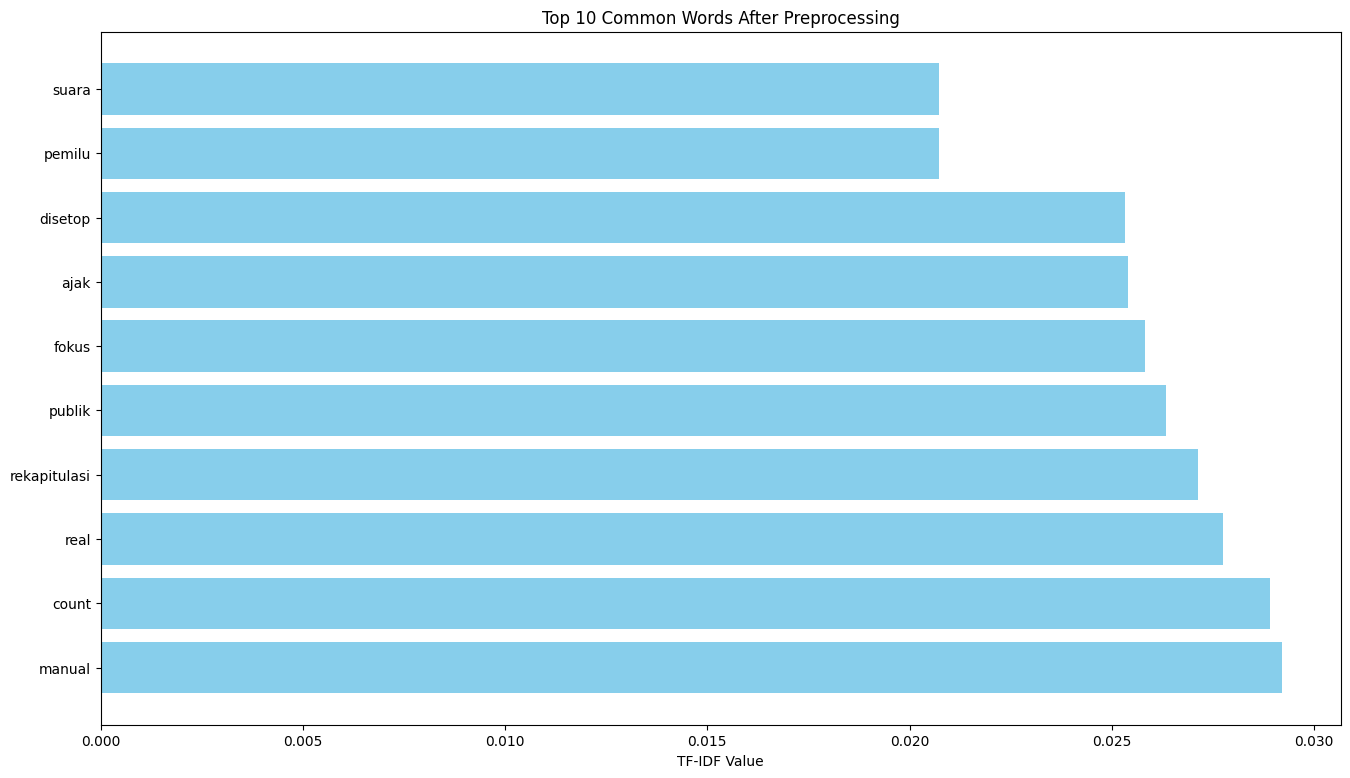

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Mendapatkan daftar kata-kata dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung nilai TF-IDF rata-rata untuk setiap kata
average_tfidf = tfidf_matrix.mean(axis=0).A1

# Membuat DataFrame untuk memudahkan pengurutan dan plotting
df2 = pd.DataFrame({'word': feature_names, 'tfidf': average_tfidf})

# Mengurutkan DataFrame berdasarkan nilai TF-IDF
df2 = df2.sort_values(by='tfidf', ascending=False)  # Change 'df' to 'df2'

# Mengambil 10 kata paling umum
top_10_words = df2.head(10)

# Plotting bar plot
plt.figure(figsize=(16, 9))
plt.barh(top_10_words['word'], top_10_words['tfidf'], color='skyblue')
plt.xlabel('TF-IDF Value')
plt.title('Top 10 Common Words After Preprocessing')
plt.show()

<ipython-input-67-0e9329dc6cdc>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



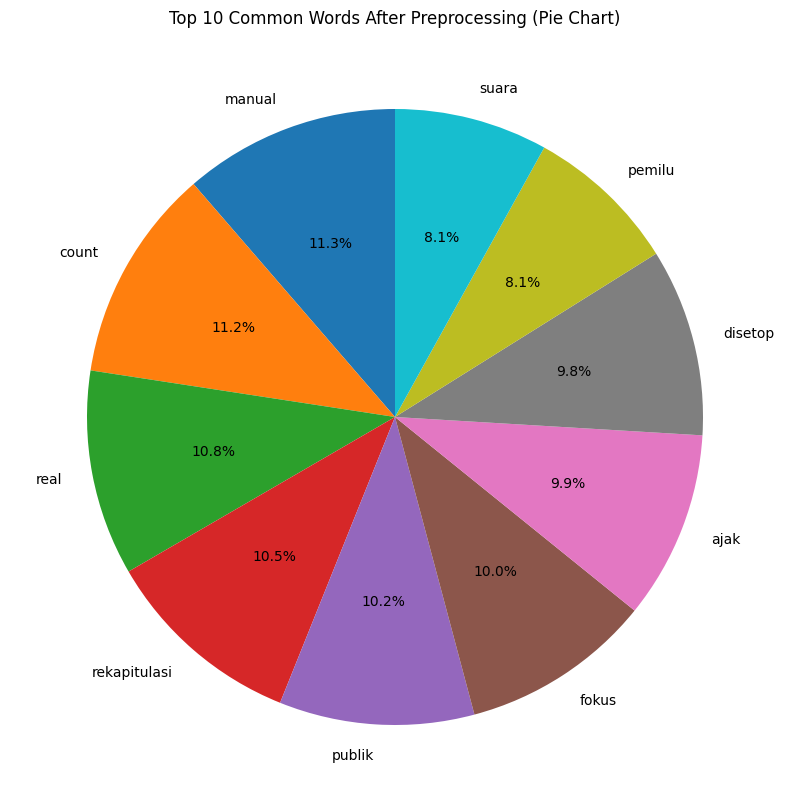

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Mendapatkan daftar kata-kata dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung nilai TF-IDF rata-rata untuk setiap kata
average_tfidf = tfidf_matrix.mean(axis=0).A1

# Membuat DataFrame untuk memudahkan pengurutan dan plotting
df2 = pd.DataFrame({'word': feature_names, 'tfidf': average_tfidf})

# Mengurutkan DataFrame berdasarkan nilai TF-IDF
df2 = df2.sort_values(by='tfidf', ascending=False)

# Mengambil 10 kata paling umum
top_10_words = df2.head(10)

# Menghitung total TF-IDF untuk 10 kata paling umum
total_tfidf = top_10_words['tfidf'].sum()

# Menghitung persentase TF-IDF untuk setiap kata
top_10_words['percentage'] = (top_10_words['tfidf'] / total_tfidf) * 100

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_10_words['percentage'], labels=top_10_words['word'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Common Words After Preprocessing (Pie Chart)')
plt.show()


# Clustering Data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



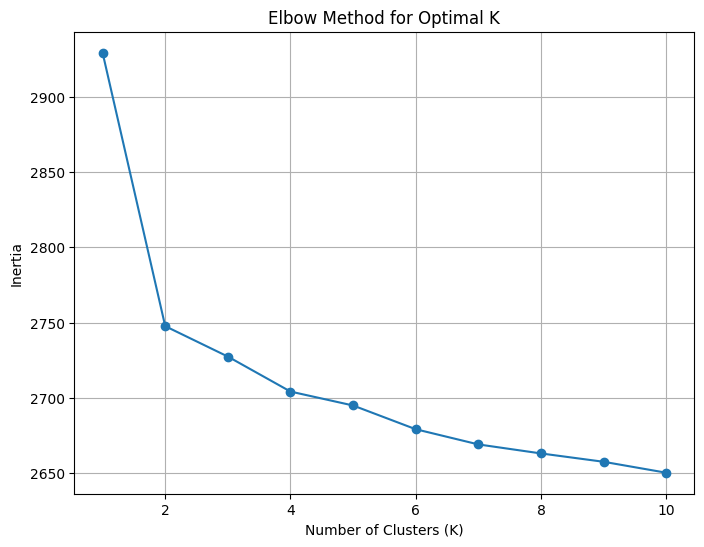

In [68]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create an empty list to store the sum of squared distances (inertia) for different K values
inertia = []

# Define a range of K values (number of clusters) to try
k_range = range(1, 11)  # You can adjust this range based on your data and objectives

# Iterate through each K value and calculate the K-Means inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=99)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [69]:
from sklearn.cluster import MiniBatchKMeans

# Initialize MiniBatchKMeans with the desired parameters
model = MiniBatchKMeans(n_clusters=2, init='k-means++', random_state=99, n_init=1, batch_size=100)

# Fit the model to your bag-of-words data
model.fit(tfidf_matrix)

clusters_labels = model.labels_

In [70]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(tfidf_matrix, model.labels_)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.006820560861302793


# Word Cloud

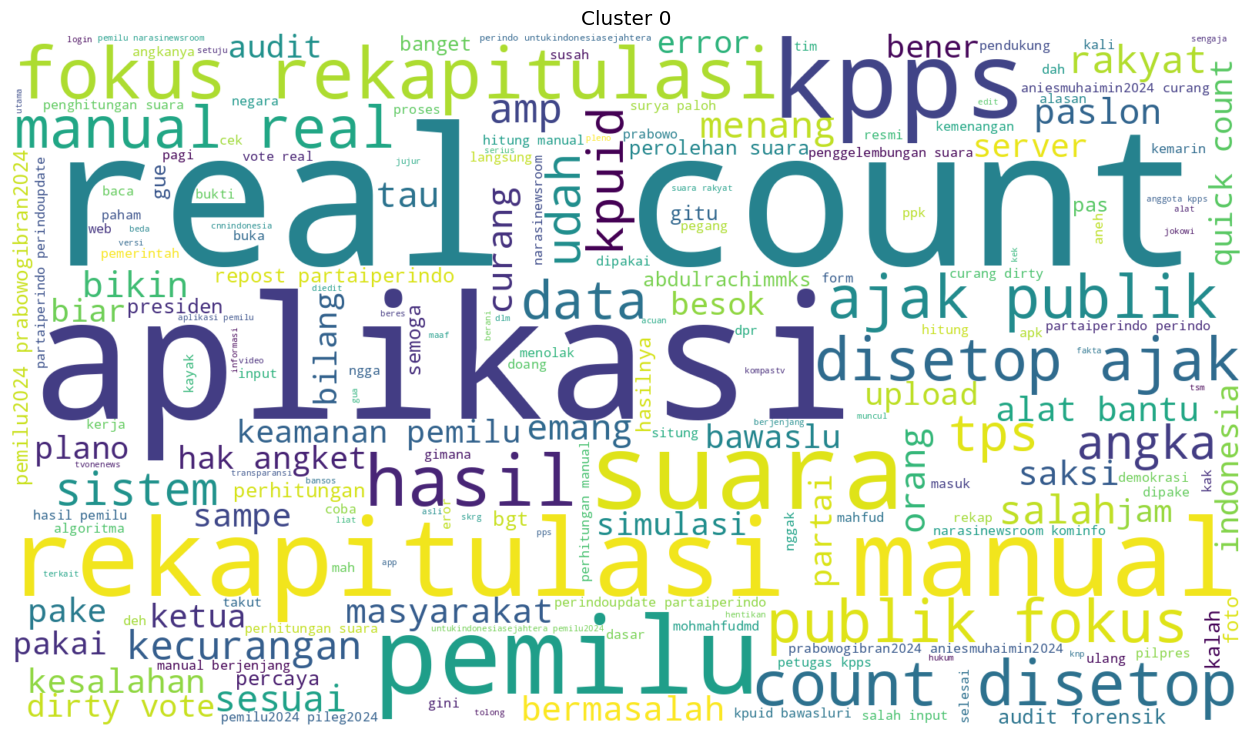

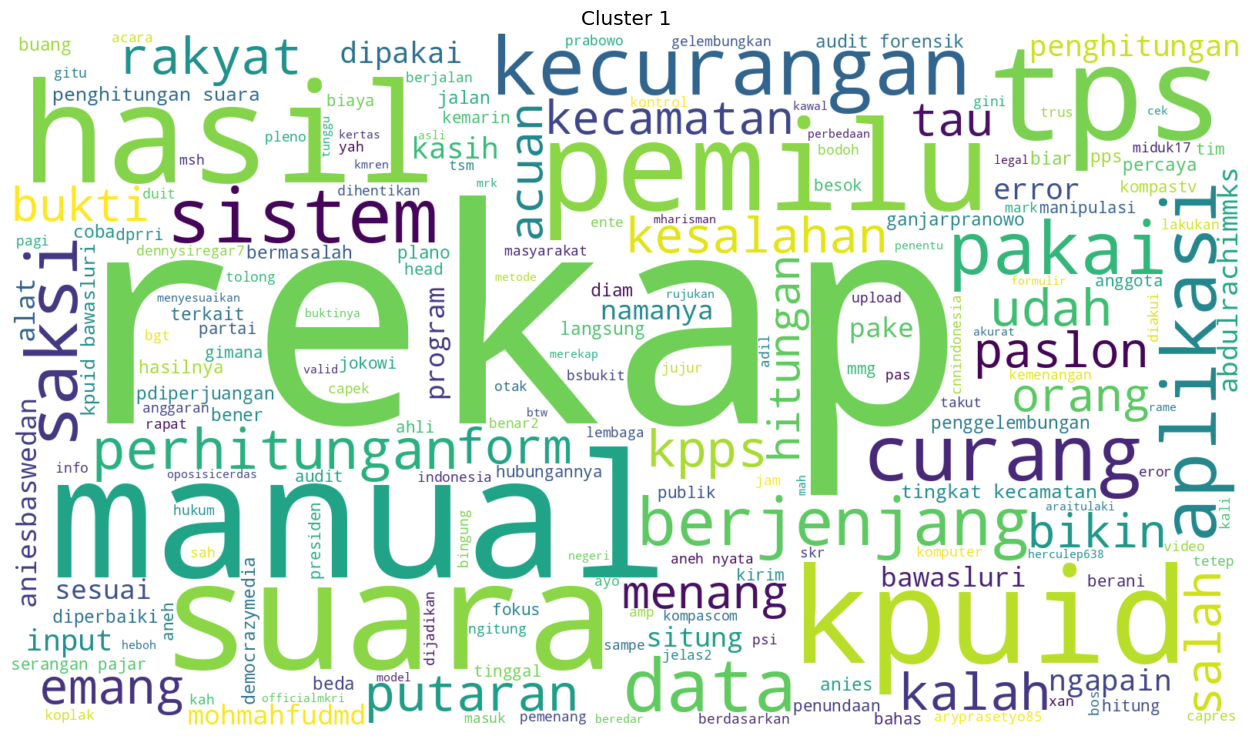

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menginisialisasi WordCloud
wordcloud = WordCloud(width=1600, height=900, background_color='white')

# Loop untuk setiap kluster
for cluster in range(2):  # 2 kluster
    cluster_texts = [preprocessed_texts[i] for i, label in enumerate(clusters_labels) if label == cluster]
    cluster_texts = ' '.join(cluster_texts)

    # Membuat WordCloud untuk kluster
    wordcloud.generate(cluster_texts)

    # Menampilkan WordCloud
    plt.figure(figsize=(16, 9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster}')
    plt.axis('off')
    plt.show()

# Trend Analysis

In [72]:
import pandas as pd

# Load the DataFrame
df_d = pd.read_csv("integrated_sirekap.csv")

# Drop unwanted columns (corrected indentation)
columns_to_drop = [
    'full_text', 'id_str', 'quote_count', 'reply_count', 'retweet_count',
    'favorite_count', 'lang', 'user_id_str', 'conversation_id_str', 'username',
    'tweet_url'
]
df_d = df_d.drop(columns_to_drop, axis=1)  # Explicitly specify axis=1

# Display the first few rows
df_d.head()

created_at
0  Sun Feb 18 23:59:14 +0000 2024
1  Sun Feb 18 23:58:42 +0000 2024
2  Sun Feb 18 23:57:58 +0000 2024
3  Sun Feb 18 23:57:45 +0000 2024
4  Sun Feb 18 23:57:40 +0000 2024

In [73]:
import pandas as pd

# ... (your code to populate df_d['created_at'])

df_d['created_at'] = pd.to_datetime(df_d['created_at'])

# Filter data excluding the specific date
filtered_data = df_d[df_d['created_at'].dt.date != pd.to_datetime('2024-03-08')]

# Create Series and DataFrame (assuming same logic as before)
by_date = pd.Series(filtered_data['created_at'].dt.date).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('date').reset_index(name='counts')

# Display DataFrame
df_date


<ipython-input-73-527e5e7ba847>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



date  counts
0 2024-02-13     672
1 2024-02-18     687
2 2024-02-20     373
3 2024-02-27     426
4 2024-03-08     171
5 2024-03-09     641

In [74]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=df_date['date'].astype(dtype=str),
                                y=df_date['counts'],
                                marker_color='black', text="counts"))
fig.update_layout({"title": 'Tweets about Sirekap from Februari 2024 to March 2024 Week by Week',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Total tweets"},
                   "showlegend": False})
fig.show()

In [75]:
import numpy as np
import networkx as nx

In [76]:
# Load the DataFrame
df_sna = pd.read_csv("integrated_sirekap.csv")
df_sna = df_sna[['created_at','id_str','full_text','username']]
df_sna.columns = ['Datetime', 'Tweet ID','Text', 'Username']
df_sna = df_sna.replace(np.nan, '')

num_tweets = len(df_sna)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

display(df_sna.head())

Jumlah tweet dalam dataframe adalah 2970.


Datetime             Tweet ID  \
0  Sun Feb 18 23:59:14 +0000 2024  1759366999048942033   
1  Sun Feb 18 23:58:42 +0000 2024  1759366864348860460   
2  Sun Feb 18 23:57:58 +0000 2024  1759366680520859935   
3  Sun Feb 18 23:57:45 +0000 2024  1759366626955395162   
4  Sun Feb 18 23:57:40 +0000 2024  1759366605006630929   

                                                Text         Username  
0   @iam_zelt Diberi nilai oleh Rakyat atau SIREKAP?    RakyatJelatas  
1  @faizalassegaf siRekap melulu bro?? 🤭   buktik...    imammahyudin8  
2  Betul sekali, stlh tipu2 sirekap dibongkar sam...  faridelhakamy12  
3  Sirekap kenapa dah? apa suara yg salah input s...         helmyibo  
4  PENGGANTIAN ATAU PERUBAHAN  SISTEM HITUNG SUAR...     penjagadapur

In [77]:
G_mention = nx.DiGraph()

for r in df_sna.iterrows():
  author = r[1]['Username']
  author = f'@{author}'

  text = r[1]['Text']

  try:
    timestamp = pd.to_datetime(r[1]['Datetime'])
  except:
    continue

  mentions = set(re.findall(r"@\w+", text))  # Updated regular expression for Twitter mentions


  if len(mentions)>0:
    for u in mentions:
      u = f'@{u}'
      G_mention.add_edge(author, u, Timestamp=timestamp)

In [78]:
import networkx as nx
from operator import itemgetter

# Create a NetworkX graph (Replace with your specific graph creation)
# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph (Replace with your graph data)

# Calculate Degree Centrality
graph_centrality = nx.degree_centrality(graph)
max_de = max(graph_centrality.items(), key=itemgetter(1))

# Calculate Closeness Centrality
graph_closeness = nx.closeness_centrality(graph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

# Calculate Betweenness Centrality
graph_betweenness = nx.betweenness_centrality(graph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))


In [79]:
import networkx as nx

# Define your specific type of graph, for example, a directed graph (DiGraph)
graph = nx.DiGraph()

# Add nodes to the graph
graph.add_node("A")
graph.add_node("B")
graph.add_node("C")

# Add edges to the graph
graph.add_edge("A", "B")
graph.add_edge("B", "C")

# Calculate Degree Centrality
graph_centrality = nx.degree_centrality(graph)
max_de = max(graph_centrality.items(), key=itemgetter(1))

# Calculate Closeness Centrality
graph_closeness = nx.closeness_centrality(graph)
max_clo = max(graph_closeness.items(), key=itemgetter(1))

# Calculate Betweenness Centrality
graph_betweenness = nx.betweenness_centrality(graph, normalized=True, endpoints=False)
max_bet = max(graph_betweenness.items(), key=itemgetter(1))


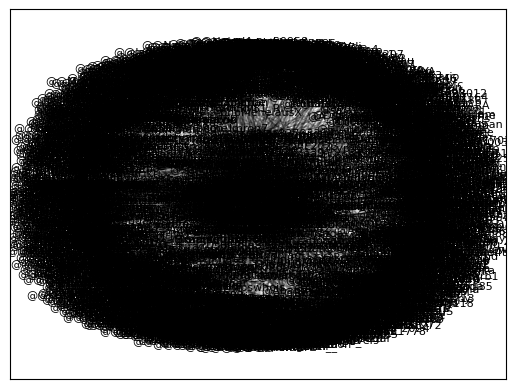

In [80]:
# Filter nodes based on centrality dictionary
filtered_nodes = [node for node in G_mention.nodes if node in graph_centrality]
pos = nx.spring_layout(G_mention)
# Calculate sizes and colors for filtered nodes
sizes = [graph_centrality[node] * 10000 for node in filtered_nodes]
colors = [graph_centrality[node] for node in filtered_nodes]

# Draw nodes, labels, and edges
nodes = nx.draw_networkx_nodes(G_mention, pos, alpha=0.8,
                               nodelist=filtered_nodes,  # Use filtered nodes
                               node_size=sizes, node_color=colors,
                               cmap=plt.cm.Blues)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G_mention, pos, font_size=8)
nx.draw_networkx_edges(G_mention, pos, width=1.0, alpha=0.2)
plt.show()

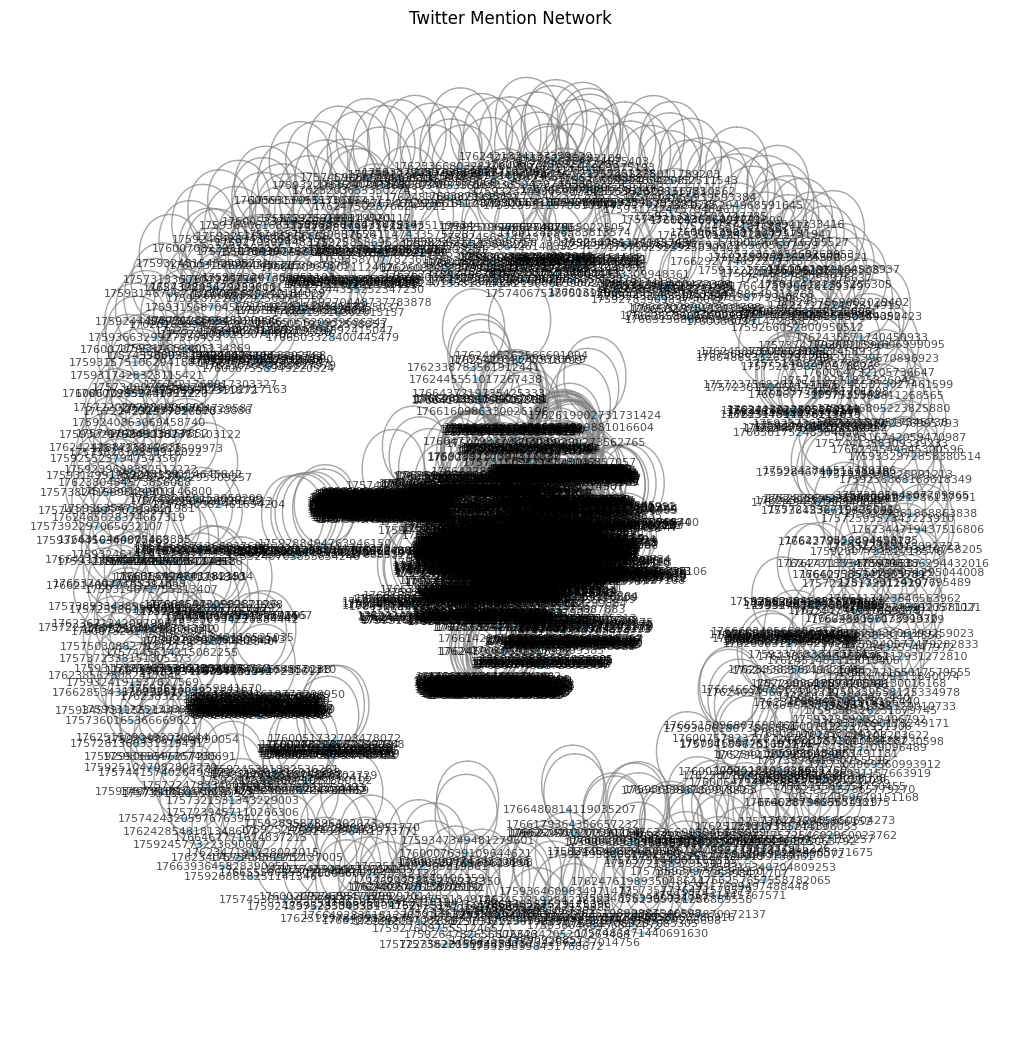

In [81]:
import networkx as nx
import pandas as pd
import re


# Step 1: Preprocess the text to extract mentions
def extract_mentions(text):
    # Use a regular expression to find mentions (usernames)
    mentions = re.findall(r'@(\w+)', text)
    return mentions

# Step 2: Create a mapping of mentions to user IDs
mention_to_user_id = {}
for index, row in df_sna.iterrows():
    user_id = row['Tweet ID']
    mentions = extract_mentions(row['Text'])
    for mention in mentions:
        mention_to_user_id[mention] = user_id

# Step 3: Use the mapping to establish connections (edges) between users
for index, row in df_sna.iterrows():
    user_id = row['Tweet ID']
    mentions = extract_mentions(row['Text'])
    for mention in mentions:
        if mention in mention_to_user_id:
            G.add_edge(user_id, mention_to_user_id[mention])

# Step 4: Create and visualize the graph
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=10, font_size=8, node_color='skyblue', edge_color='gray', alpha=0.7)
plt.title('Twitter Mention Network')
plt.show()


In [82]:
df_mention = nx.to_pandas_edgelist(G_mention)
df_mention.to_csv('mention.csv', index=False)

In [83]:
# Load the tweet data from your CSV file with specified delimiter
df3 = pd.read_csv("mention.csv", delimiter=",")

# Display the DataFrame to view the separated columns
display(df3)

source             target                  Timestamp
0     @RakyatJelatas         @@iam_zelt  2024-02-18 23:59:14+00:00
1     @RakyatJelatas    @@ganjarpranowo  2024-02-27 10:43:36+00:00
2     @RakyatJelatas    @@aniesbaswedan  2024-02-27 10:43:36+00:00
3     @RakyatJelatas          @@TeddGus  2024-02-27 10:43:36+00:00
4     @imammahyudin8    @@faizalassegaf  2024-02-18 23:58:42+00:00
...              ...                ...                        ...
2894    @gatauahdark          @@chvruse  2024-02-13 01:48:39+00:00
2895        @Niscapp  @@InformasiKita99  2024-02-13 01:45:44+00:00
2896  @zahramoonchan  @@InformasiKita99  2024-02-13 01:30:22+00:00
2897  @zahramoonchan          @@sirekap  2024-02-13 01:17:20+00:00
2898          @vvor0     @@CNNIndonesia  2024-02-13 01:16:31+00:00

[2899 rows x 3 columns]

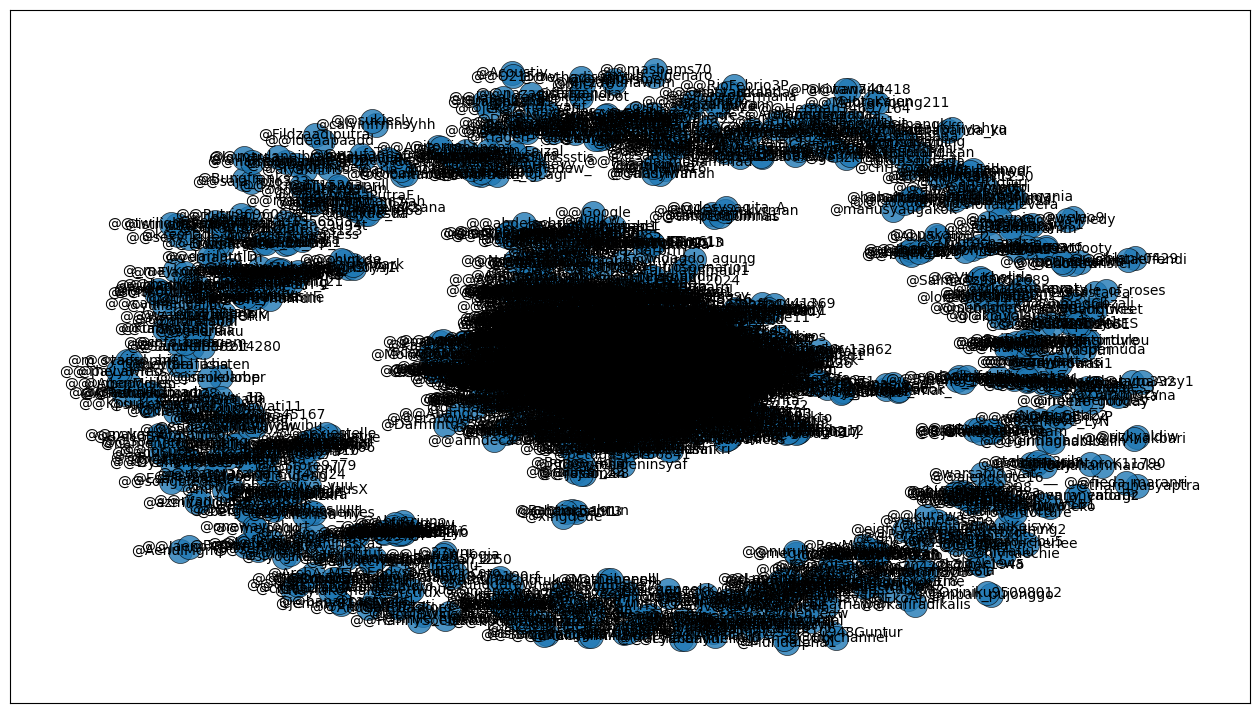

In [86]:
G = nx.from_pandas_edgelist(df3,'source','target')
pos = nx.spring_layout(G)


# Create a plot
f, ax = plt.subplots(figsize=(16, 9))
plt.style.use('ggplot')

# Draw nodes with an edgecolor
nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
nodes.set_edgecolor('k')

# Draw labels and edges
nx.draw_networkx_labels(G, pos, font_size=10)  # Note the corrected function name
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)